## Adult Dataset Part 1: Cleaning and Preparation

#### Objectives:
1. Preprocess the data and store the cleaned dataset as adult_clean.csv
2. Load clean dataset and test supervised/unsupervised models
    - Goal: Determine best model to predict if new entry earns >50k or <50k with supervised learning
    - Goal: Find insights and patterns in data using unspuervised learning
3. Apply k-folds cross validation
    - Goal: Evaluate robustness of results across different models.
    - Goal: Use and justify different error metrics


#### Summary of dataset

Datasource: https://archive.ics.uci.edu/ml/datasets/adult

Feature descrptions copied below from the UCI website:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: Continuous. A weighting assigned from the sampling process.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous.
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- target: >50K, <=50K.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#original data does not come with headers. add headers based on the documentation descrption
headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'target']

In [93]:
data = pd.read_csv('./data/adult.data', names = headers)
df = data.copy()

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


On first look, it appears there are no missing values. **However the dataset descrption indicates that missing values have been flled with '?'.** Figure out what to do here :)

In [95]:
df.apply(lambda x: (x.astype(str).str.strip() == '?').sum(), axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

In [96]:
df= df.apply(lambda i: i.astype(str).str.strip().replace('?',np.nan))




In [97]:
df[['age','fnlwgt', 'education-num','capital-gain','capital-loss','hours-per-week']] =df[['age','fnlwgt', 'education-num','capital-gain','capital-loss','hours-per-week']].apply(pd.to_numeric)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Before deciding **how to deal with the missing values want to know how they influence the data**. For example, if workclass and occupation for example both have missing values (in the same tuple) it would be reasonable to drop the data.

In [99]:
#code
nanentry1 =len(df[(df['workclass'].isnull()) & (df['occupation'].isnull()) ])
print('Occupation nans in same row as workclass with a nan:', nanentry1)
nanentry2 = len(df[(df['workclass'].isnull()) & (df['native-country'].isnull()) ])
print('Native-country nans in same row as workclass with a nan: ',nanentry2)

Occupation nans in same row as workclass with a nan: 1836
Native-country nans in same row as workclass with a nan:  27


**What % of the dataset do nans represent?** What is the **best approach** for dealing with the nan's?

#### Percentage of missing value in easch column

In [100]:
col_nan_percentage = (df.isna().sum() /len(df)) * 100
print(col_nan_percentage)

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.790486
target            0.000000
dtype: float64


#### Total percentage of nan in the dataset

In [101]:
Total_nan = (df.isna().sum().sum()/len(df) ) * 100
print('The total percentage of missing data is:', Total_nan)

The total percentage of missing data is: 13.08927858481005


#### Dropping rows where Occupation and  workclass are nan:

In [102]:
df =df.drop(df[(df['workclass'].isnull()) & (df['occupation'].isnull()) ].index)


#### Dropping rows where Native-country and workclass are both nan

In [103]:
df =df.drop(df[(df['workclass'].isnull()) & (df['native-country'].isnull()) ].index)

#### Inspecting the remaining nan rows 

In [104]:
df.isna().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          7
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    556
target              0
dtype: int64

In [106]:
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
new_data = imp_mode.fit_transform(df)
Clean_df = pd.DataFrame(new_data,columns=headers)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [81]:

unique_values = []
for i in df.columns:
    unique_count = df[i].value_counts().count()
    unique_values.append([unique_count])
pd.DataFrame( unique_values,   index= df.columns, columns= ['Unique value count'] )

,Unique value count
age,72
workclass,8
fnlwgt,20498
education,16
education-num,16
marital-status,7
occupation,14
relationship,6
race,5
sex,2


In [82]:
cat_col = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
cat_df =df[cat_col]


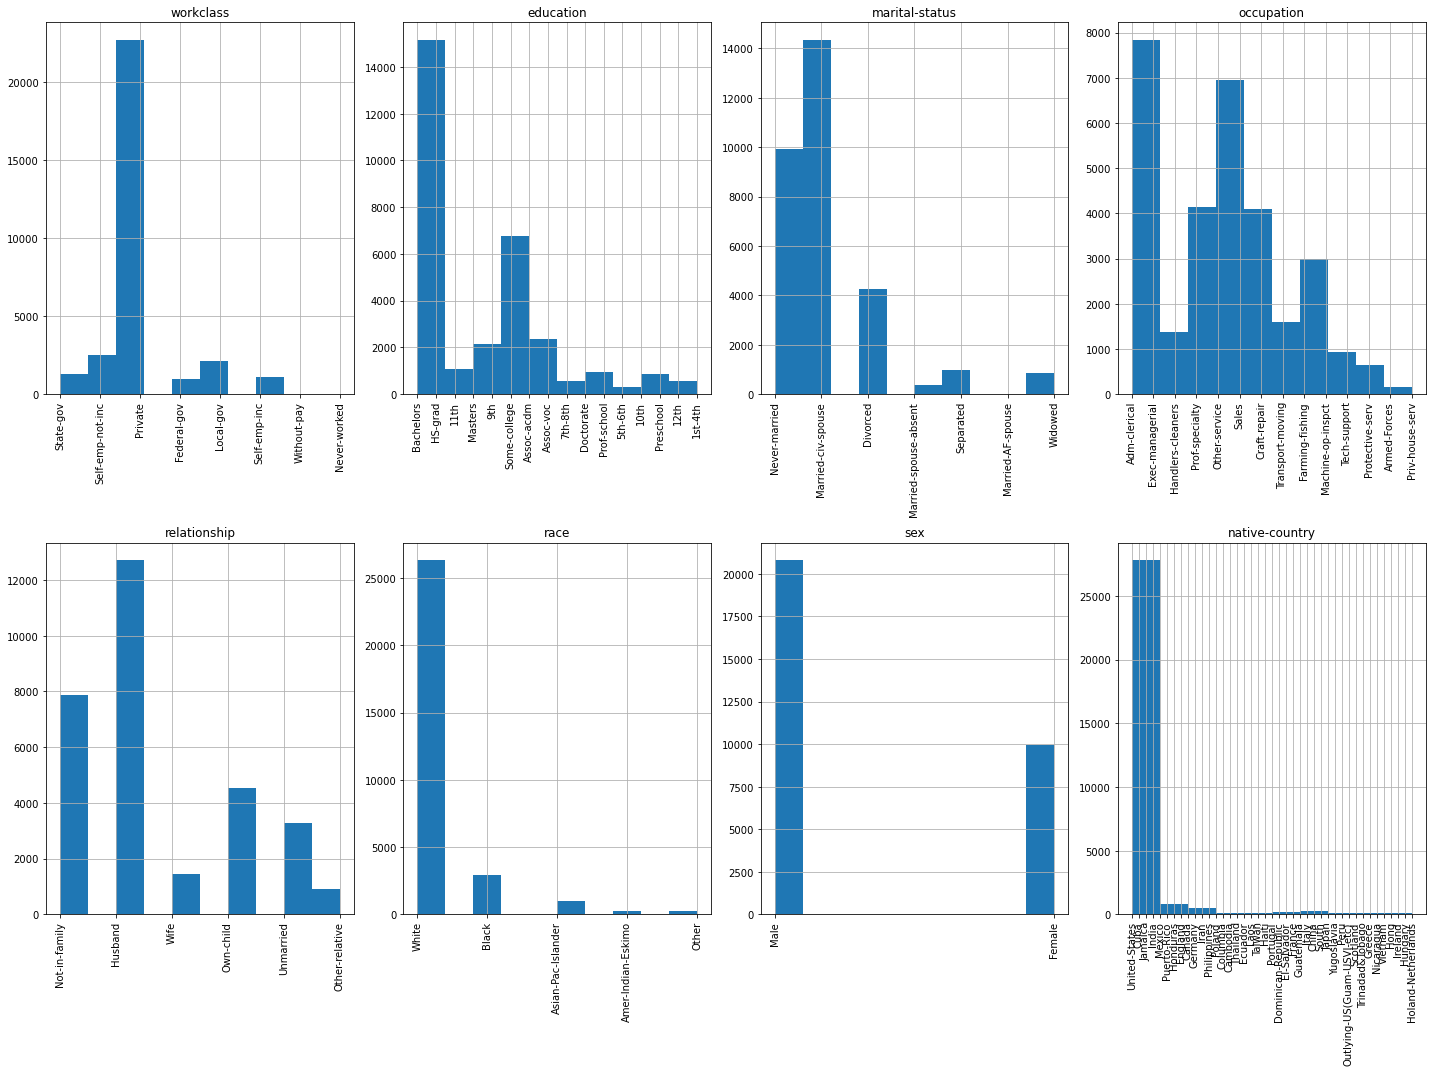

In [83]:
from math import ceil
plt.subplots(figsize=(20,15))
cols = 4
rows = ceil(len(cat_col) / cols)
for index, col_name in enumerate(cat_col):
    plt.subplot(rows, cols, index + 1)
    cat_df[col_name].hist()
    plt.title(col_name)
    plt.xticks(rotation=90)
    plt.tight_layout() # to remove overlapping between the axis names and the titles of the plots
plt.show()


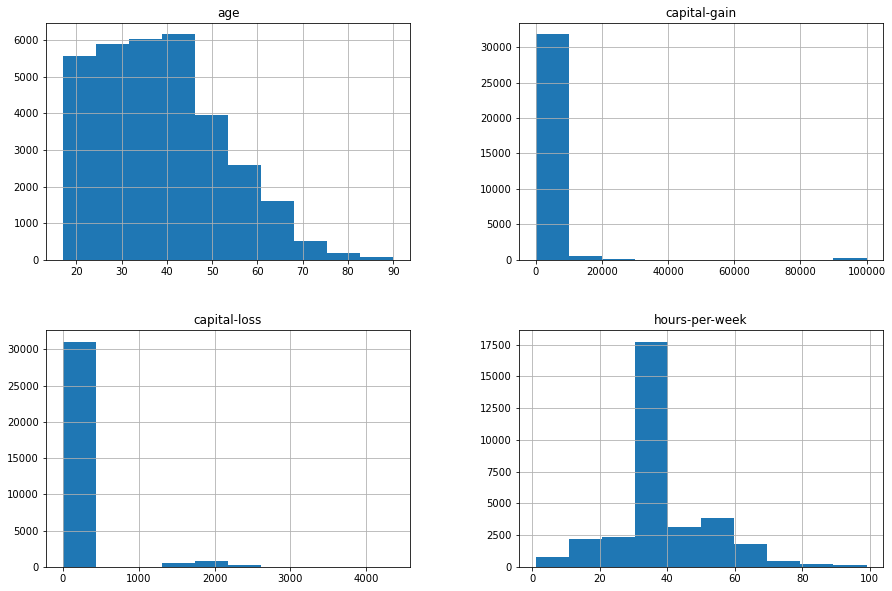

In [16]:
#plot the numerical columns
num_df = df[['age','capital-gain','capital-loss','hours-per-week']]
num_df.hist(figsize=(15, 10))
# plt.fig
plt.show()

#### Additional Steps:
1. Apply statistical tests to determine if dropping values changes the structure of the distribution in the workplace, occupation, and native-country categories i.e. t-test for differnce of modes. 
2. Compare filling the workplace and occupation columns with mode values and applying same statistical tests.

In [17]:
#train / test... you know the drill

# Discussion of results